##  MLP/Weight/Dec_29.pth


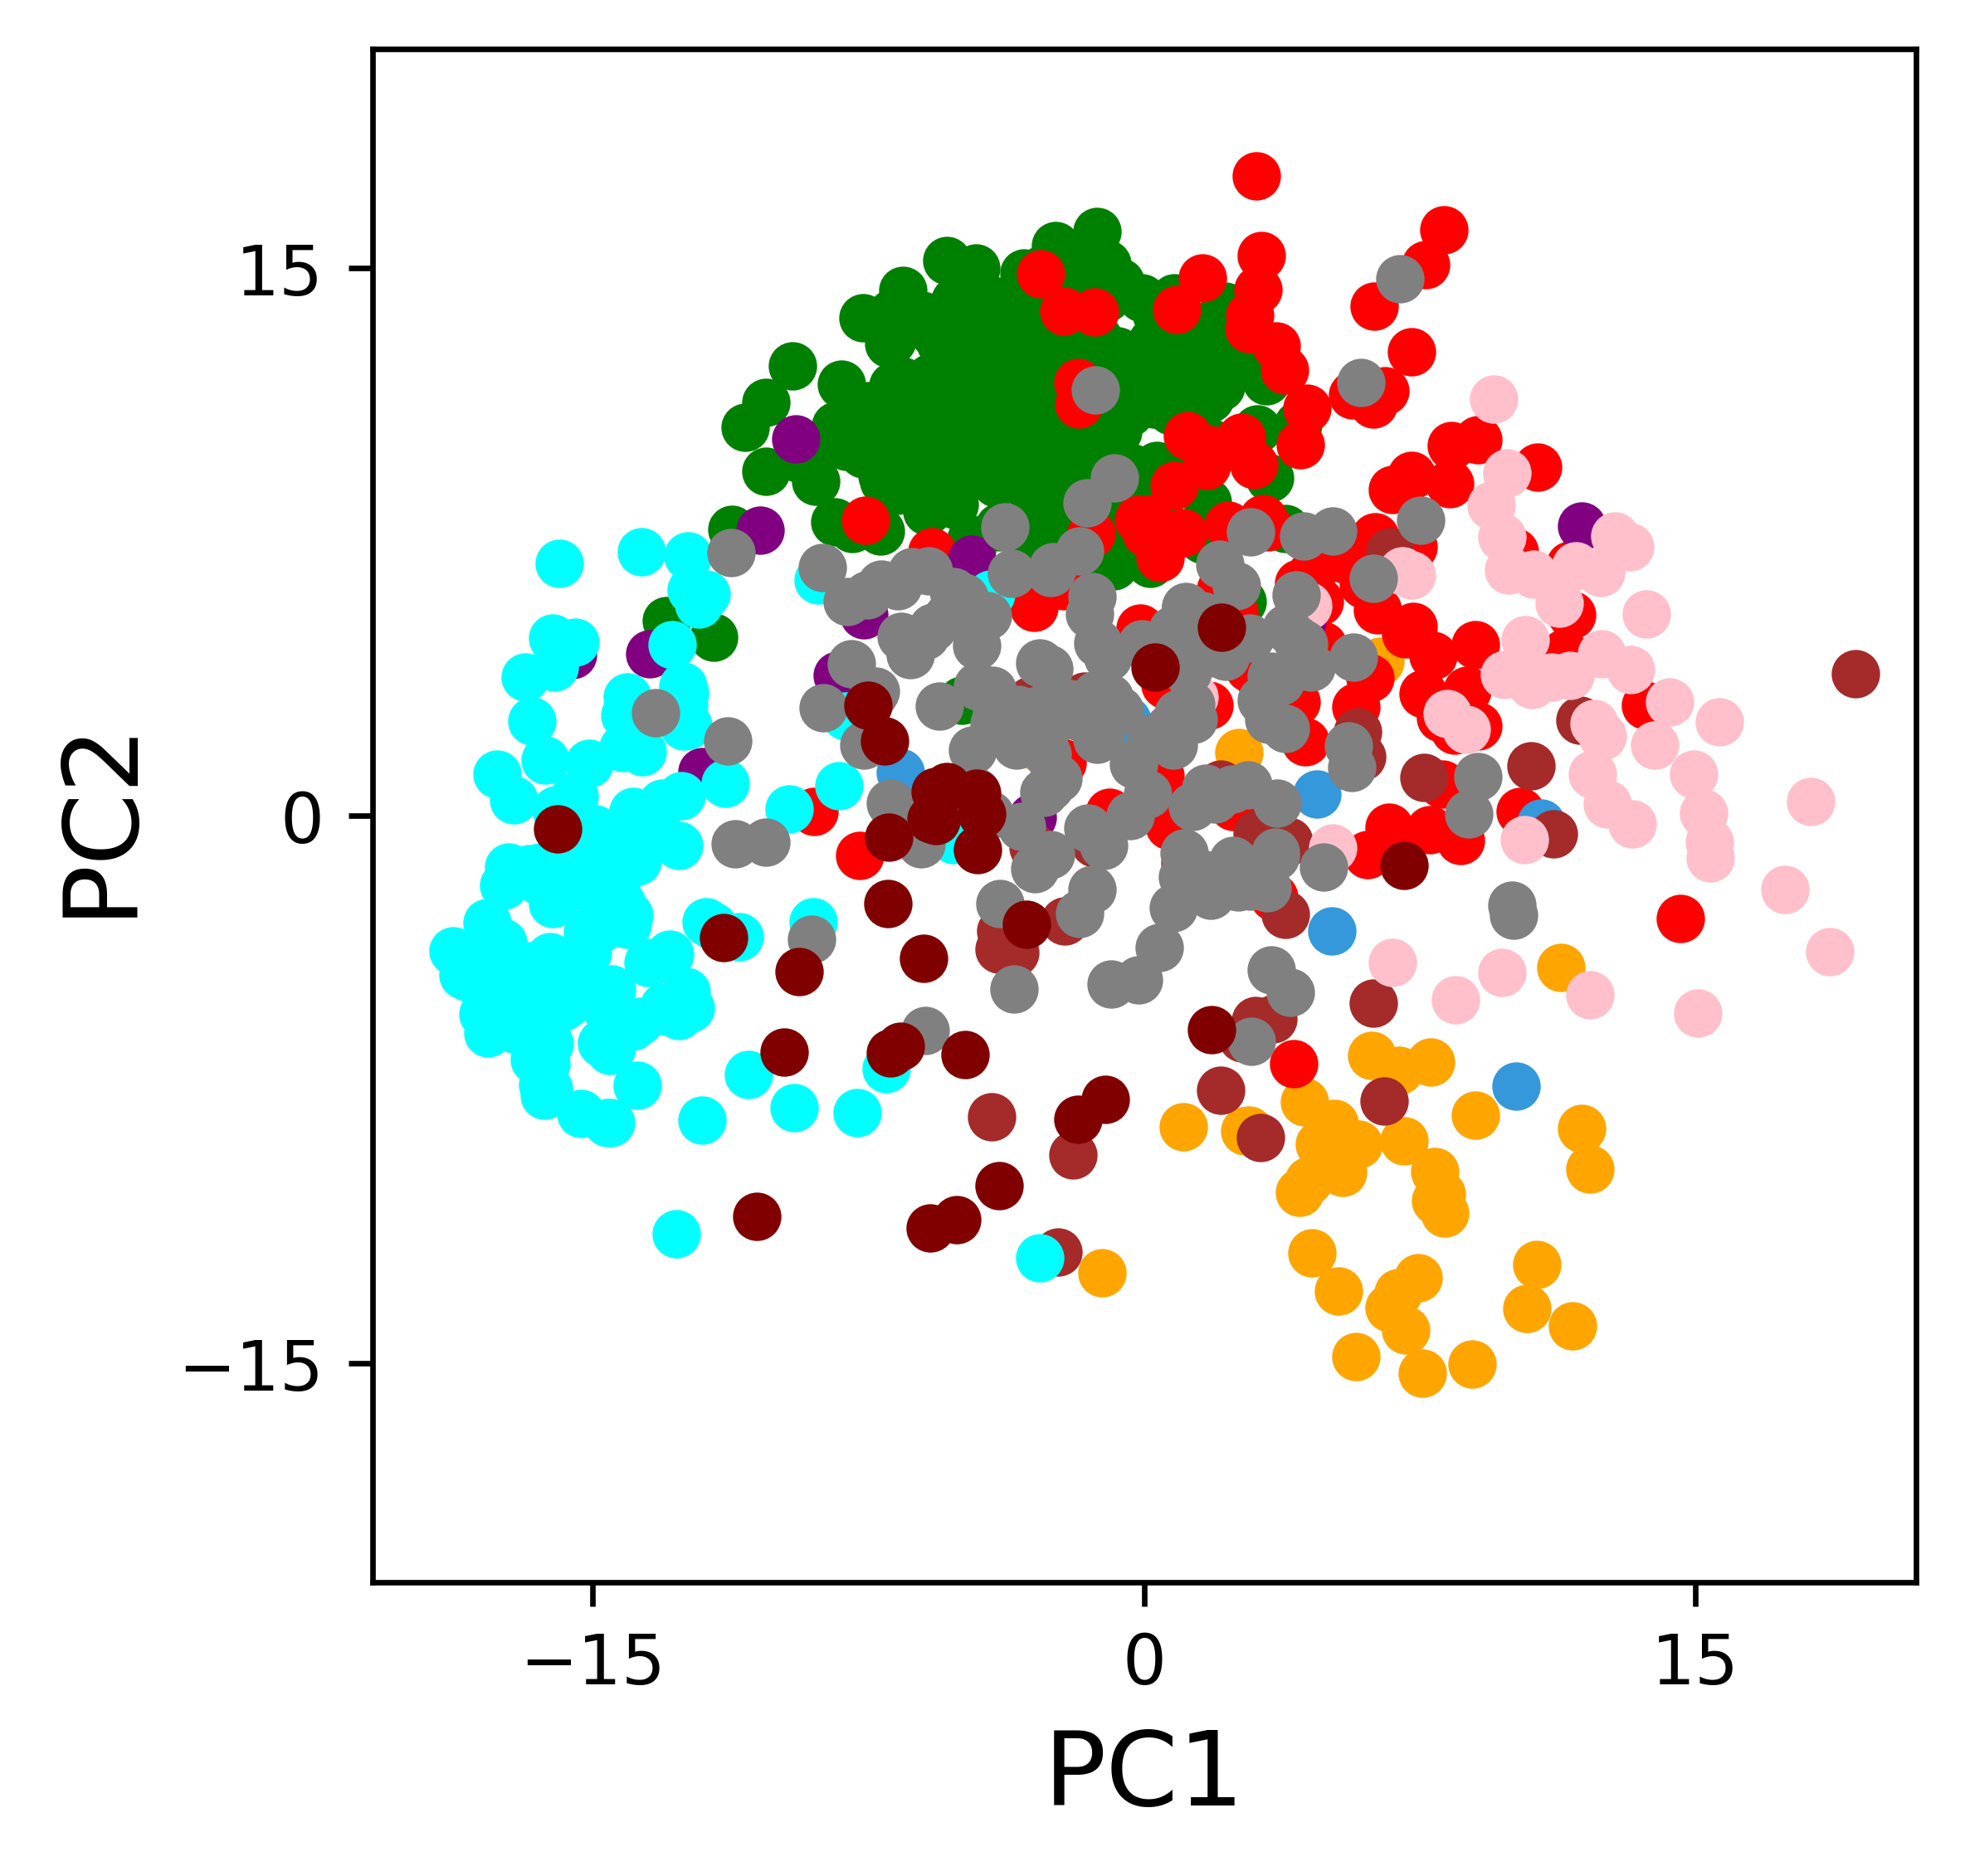

In [2]:
#########################
#       设置超参数       #
#########################
train_subset= 5000
test_subset= 10

# batch00
batch_size0 = 50
# batch_size_test=10000

#神经网络模型参数
in_features = 784
hidden1_features=1000
out_features = 10


# download_path =  "FBM/Weight/dF=1.2_lam=0.01_0.pth"
download_path = "MLP/Weight/Dec_29.pth"
upload_path = None


#########################
#       Libraries       #
#########################
import numpy as np
from FBM import neural_network
import torch.nn as nn
import torch.optim as optim
from sklearn.decomposition import PCA
# 使用所有数据拟合PCA模型
pca = PCA(n_components=20)
import torch
############################
#       生成模拟数据         #
############################

### 十分类
from FBM.Utils_Mnist import mnist_10_loader_torch

train_set_0, train_set_1, train_set_2, train_set_3, train_set_4, train_set_5, train_set_6, train_set_7, train_set_8, train_set_9, \
test_set_0, test_set_1, test_set_2, test_set_3, test_set_4, test_set_5, test_set_6, test_set_7, test_set_8, test_set_9 \
    = mnist_10_loader_torch.load_data_wrapper(train_subset=train_subset, test_subset=test_subset,root="Mnist")

#########################
#       训练神经网络     #
#########################
# 神经网络模型设定
device = torch.device('cpu')
model = neural_network.R_calibrate3_Net(device, torch.nn.Tanh(), in_features=784, hidden1_features=1000,
                                out_features=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()))

if download_path != None:
        model.load_state_dict(torch.load(download_path))
        print('## ', download_path)


##########################
#      原始数据PCA测试     #
##########################
import matplotlib.pyplot as plt

Alice_sample = torch.stack([item[0] for item in train_set_0], dim=0)
Alice_sample = Alice_sample.view(-1, in_features)

Bob_sample = torch.stack([item[0] for item in train_set_1], dim=0)
Bob_sample = Bob_sample.view(-1, in_features)

Chris_sample = torch.stack([item[0] for item in train_set_2], dim=0)
Chris_sample = Chris_sample.view(-1, in_features)

David_sample = torch.stack([item[0] for item in train_set_3], dim=0)
David_sample = David_sample.view(-1, in_features)

E_sample = torch.stack([item[0] for item in train_set_4], dim=0)
E_sample = E_sample.view(-1, in_features)

F_sample = torch.stack([item[0] for item in train_set_5], dim=0)
F_sample = F_sample.view(-1, in_features)

G_sample = torch.stack([item[0] for item in train_set_6], dim=0)
G_sample = G_sample.view(-1, in_features)

H_sample = torch.stack([item[0] for item in train_set_7], dim=0)
H_sample = H_sample.view(-1, in_features)

I_sample = torch.stack([item[0] for item in train_set_8], dim=0)
I_sample = I_sample.view(-1, in_features)

J_sample = torch.stack([item[0] for item in train_set_9], dim=0)
J_sample = J_sample.view(-1, in_features)


##########################
#      神经网络PCA测试     #
##########################
with torch.no_grad():
        outpoint0 = torch.matmul(Alice_sample, model.fc_W1)
        outpoint0 = np.tanh(outpoint0)

        outpoint1 = torch.matmul(Bob_sample, model.fc_W1)
        outpoint1 = np.tanh(outpoint1)

        outpoint2 = torch.matmul(Chris_sample, model.fc_W1)
        outpoint2 = np.tanh(outpoint2)

        outpoint3 = torch.matmul(David_sample, model.fc_W1)
        outpoint3 = np.tanh(outpoint3)

        outpoint4 = torch.matmul(E_sample, model.fc_W1)
        outpoint4 = np.tanh(outpoint4)

        outpoint5 = torch.matmul(F_sample, model.fc_W1)
        outpoint5 = np.tanh(outpoint5)

        outpoint6 = torch.matmul(G_sample, model.fc_W1)
        outpoint6 = np.tanh(outpoint6)

        outpoint7 = torch.matmul(H_sample, model.fc_W1)
        outpoint7 = np.tanh(outpoint7)

        outpoint8 = torch.matmul(I_sample, model.fc_W1)
        outpoint8 = np.tanh(outpoint8)

        outpoint9 = torch.matmul(J_sample, model.fc_W1)
        outpoint9 = np.tanh(outpoint9)


#%%
samples = [outpoint0, outpoint1, outpoint2, outpoint3, outpoint4, outpoint5, outpoint6, outpoint7, outpoint8, outpoint9]
# labels = ['Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label 6', 'Label 7', 'Label 8', 'Label 9']
labels = ['0','1','2','3','4','5','6','7','8','9']
#colors = ['red', '#B3F57C', '#7756B1', 'green','#FFA644' , '#00C9A6', 'pink', 'black','gray', '#3498DB' ]
colors =[
"#FFA500", # 橙色调
"#008000", # 绿色调
"#FF0000", # 红色调
"#800080", # 紫色调
"#3498DB", # 蓝色调
"#A52A2A", # 棕色调
"#FFC0CB", # 粉色调
"#00FFFF", # 青色调
"#808080", # 灰色调
"#800000" # 酒红色调
]
# 首先，将所有样本转换为一个大的NumPy数组
all_data = torch.cat(samples, dim=0).numpy()
all_data_transformed = pca.fit_transform(all_data)
center = np.mean(all_data_transformed, axis=0) 

sphere_point = all_data_transformed-center

# 使用 np.cumsum() 生成分割点
split_points = np.cumsum([len(s) for s in samples[:-1]])
# 将转换后的数据分割回原始样本
transformed_samples = np.split(sphere_point, split_points)

x = []
y = []
for i in range(len(labels)):
    x.append([])
    y.append([])

for s in range(len(labels)):
    transformed_samples_label = transformed_samples[s]
    for i in range(transformed_samples_label.shape[0]):
        if -0.15<transformed_samples_label[i][2]<0.15:
            x[s].append(transformed_samples_label[i][0])
            y[s].append(transformed_samples_label[i][1])
            
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4),dpi=600)
ax = plt.gca()
 

#plt.show()
#ax = plt.gca() 
#plt.scatter(transformed_samples[0][:,0], transformed_samples[0][:,1])
#plt.scatter(sphere_point[:,0], sphere_point[:,2])

for s in [0,1,2,3,4,5,6,7,8,9]:
    ax.scatter(x[s], y[s], c= colors[s])

plt.xlabel('PC1',fontsize=15)
plt.ylabel('PC2',fontsize=15)
plt.yticks([-30,-15,0,15,30],fontsize=10)
plt.xticks([-30,-15,0,15,30],fontsize=10)
plt.xlim(-21,21)
plt.ylim(-21,21)
plt.show()

# 保存神经网络连接权重
if upload_path != None:
    torch.save(model.state_dict(), upload_path)